In [1]:
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

In [2]:
def get_key(index):
    return list(para['label_dictionary'].keys())[list(para['label_dictionary'].values()).index(index)]

def batch_index(l, batch_size):
    a = l // batch_size
    b = np.random.permutation(l)
    c = np.split(b, [(i+1) * batch_size for i in range(a)])
    if len(c[-1]) == 0:
        c = c[:-1]
    return c

def cal_acc(pred_result_list):
    return sum(pred_result_list) / len(pred_result_list)

In [3]:
data = pickle.load(open('mushroom.p', 'rb'))

In [4]:
_, w, h, c = data['train_image'].shape
num_of_class = len(np.unique(data['train_label'])) # train_label에 등장하는 class의 개수로 전체 클래스의 개수를 추정
log = {
    'loss' : [],
    'train_acc' : [],
    'test_acc' : []
}

In [5]:
learning_rate = 0.00000000001
n_epochs = 25
batch_size = 16

In [11]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, w * h * c])
y = tf.placeholder(tf.int32, [None, 1])
Y_one_hot = tf.one_hot(y, num_of_class)
Y_one_hot = tf.reshape(Y_one_hot, [-1, num_of_class])

W1 = tf.get_variable("W1", shape=[w * h * c, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, num_of_class],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([num_of_class]))


hypothesis = tf.matmul(L1, W2) + b2
#logits = tf.matmul(H1, W2) + b2
#hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y_one_hot))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



#cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
#cost = tf.reduce_mean(cost_i)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

test_X = np.reshape(data['test_image'], (-1, w*h*c))
test_y = np.reshape(data['test_label'], (-1,1))

for epoch in range(n_epochs):
    for ind in batch_index(len(data['train_image']), batch_size):
        X_batch, y_batch = data['train_image'][ind], np.reshape(data['train_label'][ind], (-1,1))
        X_batch = np.reshape(X_batch, (-1, w * h * c))
        
        _, train_correct, loss1 = sess.run([optimizer, accuracy, cost], feed_dict={X: X_batch, y: y_batch})
        log['train_acc'].append(train_correct)
        log['loss'].append(loss1)
        
        test_correct = sess.run(accuracy, feed_dict={X: test_X, y: test_y})
        log['test_acc'].append(test_correct)
        
    acc_train = sess.run(accuracy, feed_dict={X: X_batch, y: y_batch})
    acc_test = sess.run(accuracy, feed_dict={X: test_X, y: test_y})
    print("Epoch:", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

Epoch: 0 Train accuracy: 0.4375 Test accuracy: 0.415
Epoch: 1 Train accuracy: 0.4375 Test accuracy: 0.415
Epoch: 2 Train accuracy: 0.4375 Test accuracy: 0.415
Epoch: 3 Train accuracy: 0.625 Test accuracy: 0.415
Epoch: 4 Train accuracy: 0.6875 Test accuracy: 0.415
Epoch: 5 Train accuracy: 0.4375 Test accuracy: 0.415
Epoch: 6 Train accuracy: 0.5625 Test accuracy: 0.415
Epoch: 7 Train accuracy: 0.5625 Test accuracy: 0.415
Epoch: 8 Train accuracy: 0.5 Test accuracy: 0.415
Epoch: 9 Train accuracy: 0.625 Test accuracy: 0.415
Epoch: 10 Train accuracy: 0.625 Test accuracy: 0.415
Epoch: 11 Train accuracy: 0.4375 Test accuracy: 0.415
Epoch: 12 Train accuracy: 0.625 Test accuracy: 0.415
Epoch: 13 Train accuracy: 0.625 Test accuracy: 0.415
Epoch: 14 Train accuracy: 0.625 Test accuracy: 0.415
Epoch: 15 Train accuracy: 0.4375 Test accuracy: 0.415
Epoch: 16 Train accuracy: 0.6875 Test accuracy: 0.415
Epoch: 17 Train accuracy: 0.5625 Test accuracy: 0.415
Epoch: 18 Train accuracy: 0.6875 Test accuracy:

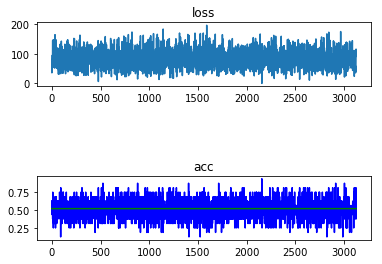

In [9]:
l = len(log['loss'])
plt.subplot(311)
plt.plot(range(l), log['loss'])
plt.title('loss')
plt.subplot(313)
plt.plot(range(l), log['train_acc'], 'b', range(l), log['test_acc'], 'g')
plt.title('acc')
plt.show()

In [32]:
sess.close()